___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.6


In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install tensorflow==2.0

In [ ]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


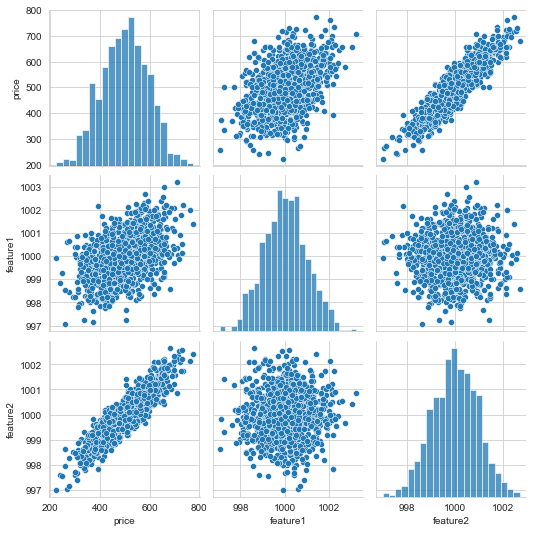

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

# datayı array olarak modele sokuyoruz (array'lar daha hızlı)
# NOT: data scale edilecekse zaten array'e dönüşüyor

In [12]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [13]:
y[:20]

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler
# genelde minmax scaler kullanıyoruz (değerleri 0-1 arasına sıkıştırdığı için hızı da artırıyor)

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train.max()

1.0

In [22]:
X_train.min()

0.0

In [23]:
X_test.max()

1.0186515935232023

In [24]:
X_test.min()

-0.014108392024525074

## Modelling

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [27]:
help(Sequential)  # ilk yapıyı kurmak için kullanıyoruz

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [28]:
help(Dense)
# dense is used for getting fully connected layers

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [29]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [30]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))  # output layer (default activation function is "linear")
# toplam 3 hidden layer oluşturduk

In [31]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [32]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# 22 ===> 700/32  (700 satır vardı train datasında)
# her çalıştırıldığında farklı sonuçlar alınır 
# (eğer model eğitilmezse yani loss'da düşüş sağlanmazsa yeniden çalıştırman gerekir)

# her iterasyonda bir önceki iterasyonun güncellenen değerleri kullanıldığından 
# buradaki loss değerleri en son iterasyonların değerlerine karşılık geliyor (22/22)

# her iterasyondan sonra değil, her epoch'tan sonra data karılıyor (default shuffle=True)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256849.7344
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256704.5312
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256615.6094
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256532.2031
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256446.5781
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256353.1719
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256249.5781
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256136.5938
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256013.3281
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255879.6875
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255735.6406
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 41.5191
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 39.2691
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 36.7108
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 34.9088
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 33.1558
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 32.2552
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 30.2926
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 29.8548
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 28.4644
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 27.7165
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 26.9117
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 26.5837
Epoch 205/250
22/2

In [34]:
model.summary()
# oluşturduğumuz modelde 57 parametre var ve her iterasyonda bu 57 parametre yeniden güncellenmiş
# parametreler, her katmandaki toplam ağırlık ve bias sayıları toplamı

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.weights
# toplam 57 parametrenin açılımı (eğitim sonundA atanan ağırlık ve bias değerleri)

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.5187144 , -0.60106444, -0.76747525,  1.8352072 ],
        [ 4.027946  , -0.44060755,  0.29728103,  2.5624833 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.7942498 ,  0.        , -0.15426736,  0.44612455], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 3.0831585 ,  0.24871685,  1.6349068 ,  2.3652008 ],
        [ 0.2765692 , -0.42723837, -0.4012529 , -0.61948186],
        [-0.67938757, -0.10162518, -0.7119277 , -0.74511933],
        [ 1.5567303 , -0.80257154,  2.3729987 ,  1.9642885 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.86850893, -0.40759513,  0.91402936,  0.01950092], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.5878982 ,  0.0128188 ,  2.193629  ,  3.1159172 ],
        [ 0.00364404,  0.0867226

In [36]:
model.history.history
# model eğitilirken oluşan LOSS değerleri

{'loss': [256849.734375,
  256704.53125,
  256615.609375,
  256532.203125,
  256446.578125,
  256353.171875,
  256249.578125,
  256136.59375,
  256013.328125,
  255879.6875,
  255735.640625,
  255580.609375,
  255414.3125,
  255237.578125,
  255047.65625,
  254845.4375,
  254628.34375,
  254394.75,
  254145.96875,
  253875.984375,
  253583.125,
  253264.59375,
  252916.921875,
  252533.84375,
  252108.984375,
  251629.28125,
  251096.109375,
  250505.09375,
  249855.765625,
  249142.421875,
  248363.0,
  247516.390625,
  246591.546875,
  245580.453125,
  244499.125,
  243328.28125,
  242063.75,
  240701.296875,
  239243.65625,
  237683.34375,
  236007.5,
  234219.25,
  232322.1875,
  230287.984375,
  228137.8125,
  225852.796875,
  223438.1875,
  220894.453125,
  218193.28125,
  215346.953125,
  212371.515625,
  209233.125,
  205937.078125,
  202513.484375,
  198912.6875,
  195144.3125,
  191241.828125,
  187159.25,
  182936.171875,
  178536.0625,
  173971.59375,
  169272.046875,
  164

In [37]:
pd.DataFrame(model.history.history)

,loss
0,256849.734
1,256704.531
2,256615.609
3,256532.203
4,256446.578
...,...
245,24.234
246,23.874
247,24.453
248,24.231


<AxesSubplot:>

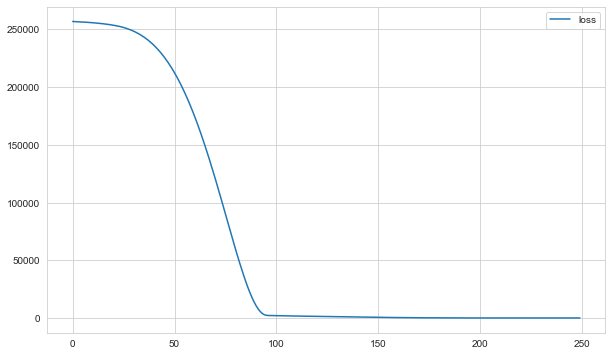

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

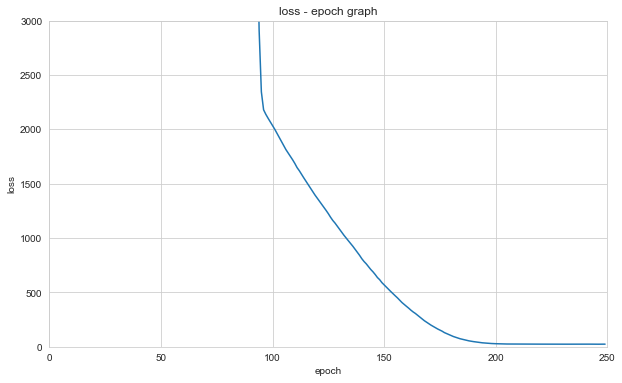

In [39]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

# 200'de istediğimiz değere gelmiş; 250 epoch olmayabilirdi (early stop)

## Model Performance

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# explained variance score'a R2 score da diyebiliriz

In [41]:
model.evaluate(X_train, y_train, verbose=0)  # mse score (modeli compile yaparken metric olarak 'mse' belirtmiştik)

23.88920783996582

In [42]:
model.evaluate(X_test, y_test, verbose=0)  # mse score
# model.evaluate (arka planda prediction yaptırıp skorları veriyor; ayrı olarak prediction yaptırmaya gerek kalmıyor)

25.528640747070312

In [43]:
y_pred = model.predict(X_test)

In [44]:
mean_squared_error(y_test, y_pred)

25.528644400956196

In [45]:
explained_variance_score(y_test, y_pred) # r2 score

0.9971686564522042

In [46]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
17,657.719,660.916
57,624.247,627.982
110,453.497,449.097
283,448.632,451.049
23,379.110,379.242
222,447.053,446.535
69,521.797,517.292
276,491.551,497.287
216,622.866,618.792
156,435.098,436.896


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

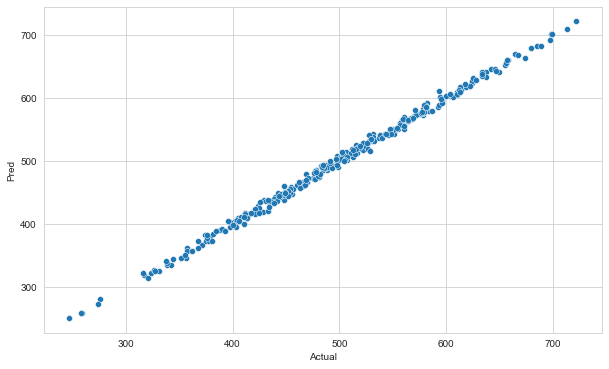

In [47]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [48]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [49]:
eval_metric(y_test, y_pred)

r2_score: 0.9970963884830643 
mae: 4.080900723652093 
mse: 25.528644400956196 
rmse: 5.052587891462769


## Final Model and Model Deployment

In [50]:
scaler = MinMaxScaler().fit(X)

In [51]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [52]:
X_scaled = scaler.transform(X)

In [53]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

# sonuçlar kötü çıksaydı (model eğitilmemiş olsaydı) tekrar çalıştıracaktık
# yukarıdakine yakın sonuçlar aldığımızda modeli kullanmak üzere kaydetmemiz gerekir

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257351.7969
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257211.5312
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257051.3125
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256864.4375
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256648.5312
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256399.1094
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 256111.5156
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 255782.0312
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 255404.8438
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 254975.5469
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 254490.1719
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 1ms/step - loss: 1363.1158
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 1331.9904
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 1300.6526
Epoch 100/250
32/32 [==============================] - 0s 2ms/step - loss: 1272.2118
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 1240.2078
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 1208.8409
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 1179.1211
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 1146.5748
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 1115.9860
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 1086.5082
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 1055.2887
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 1026.6

32/32 [==============================] - 0s 1ms/step - loss: 24.4567
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5100
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5633
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.3526
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4471
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6456
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5675
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4860
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4373
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.4955
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4989
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8741
Epoch 207/250
32/3

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [54]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model_fake_reg = load_model('model_fake_reg.h5')

In [57]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [58]:
sample = [[998, 1000]]

In [59]:
sample_scaled = scaler_fake_reg.transform(sample)

In [60]:
model_fake_reg.predict(sample_scaled)

array([[418.2008]], dtype=float32)

## Prediction-2

In [61]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [62]:
sample = pd.DataFrame(my_dict)
sample
# scale ettiğimizde array'e dönüşeceği için dataframe'e çevirebiliriz

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [63]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [64]:
model_fake_reg.predict(sample_scaled)

array([[378.18753],
       [329.94992],
       [281.71237],
       [233.47478],
       [185.2372 ]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___